# Gridworld Problem

Source: - [Monte Carlo Evaluation and Control: A Gridworld Example | Intro to Markov Chains and RL](https://www.youtube.com/watch?v=s85NsbMbaJA)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

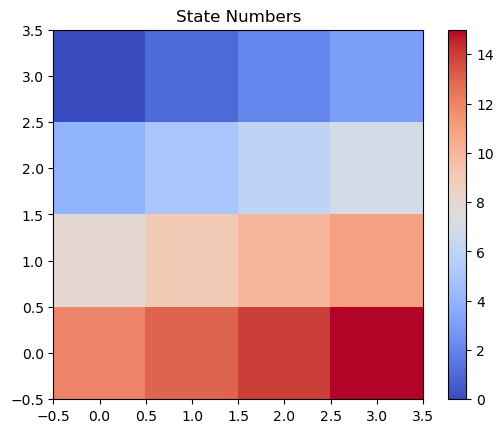

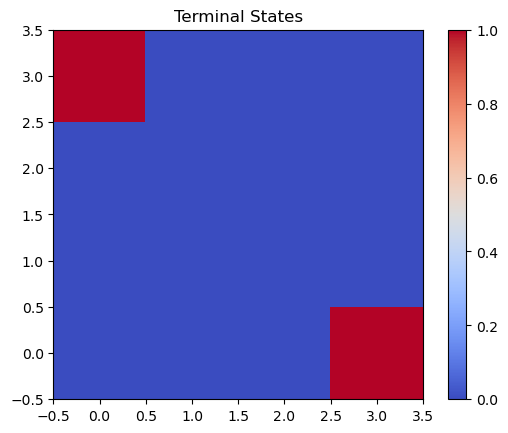

In [4]:
# Gridworld Conventions
# State 0 is the terminal state.
# Action ordering:
#   Right = 0
#   Up    = 1
#   Left  = 2
#   Down  = 3
# Directions can be determined using:
#   cos(pi/2 * a) for x
#   sin(pi/2 * a) for y

# Define gridworld state coordinates
x_coord_of_state = np.array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])
y_coord_of_state = np.array([3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0])

state_of_coord = np.array([
    [12, 8, 4, 0],
    [13, 9, 5, 1],
    [14, 10, 6, 2],
    [15, 11, 7, 3]
])

# Returns the next state given the current state and chosen action.
def gridworld_next_state(state, action, p_wind=0.1): 
    x, y = x_coord_of_state[state], y_coord_of_state[state]

    # Determine the actual action with wind probability
    my_action = np.random.choice(
        [action, 0, 1, 2, 3], 
        p=[1 - p_wind, p_wind / 4, p_wind / 4, p_wind / 4, p_wind / 4]
    )

    # Calculate direction offsets
    dir_x = round(np.cos(np.pi / 2 * my_action))
    dir_y = round(np.sin(np.pi / 2 * my_action))

    # Compute new coordinates
    new_x, new_y = x + dir_x, y + dir_y

    # Check boundaries
    if new_x > 3 or new_x < 0 or new_y > 3 or new_y < 0:
        return state
    return state_of_coord[new_x, new_y]

# Determines if a given state is terminal.
def is_terminal(state):
    if state == 0 or state == 15:
        return True
    else:
        return False

# Visualizes a given state function as a 4x4 matrix plot.
def visualize_function(state_function, title):
    matrix = np.zeros((4, 4))
    for s in range(16):
        matrix[y_coord_of_state[s], x_coord_of_state[s]] = state_function[s]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.imshow(matrix, origin='lower', cmap='coolwarm')

    fig.colorbar(cax)
    plt.title(title)

# Visualize state numbers
visualize_function(np.arange(16), "State Numbers")
plt.show()

# Visualize terminal states
visualize_function(
    np.array([is_terminal(s) for s in range(16)]), 
    "Terminal States"
)
plt.show()

## Monte Carlo Value Function for a given policy

In [ ]:
# Estimates how good the given policy is.
def monte_carlo_value_function(policy, num_episodes=10, max_time=200):
    value_function = np.zeros(16)
    num_visits = np.zeros(16)
    
    for i in range(num_episodes):
        # PART I: Generate a history of observing the robot
        current_state = np.random.randint(1, 15)  # Start at a random non-terminal state
        current_time = 0
        
        # Initialize state and reward histories
        state_history = np.zeros(max_time + 1, dtype=int)
        reward_history = np.zeros(max_time + 1)
        
        while True:
            state_history[current_time] = current_state
            
            if is_terminal(current_state) or current_time >= max_time:
                reward_history[current_time] = 0  # Terminal rewards are zero
                break
            else: # Reward for non-terminal states
                reward_history[current_time] = -1  # Negative reward for each step
                
                current_state = gridworld_next_state(current_state, policy[current_state])
                current_time += 1

        t_final = current_time
        
        # PART II: Update the value function for states visited in this episode
        visited_already = np.zeros(16, dtype=bool)  # Track if a state is visited in this episode

        for t in range(0, t_final + 1):  # Loop through all visited states
            state = state_history[t]

            if not visited_already[state]: # state is not visited
                # Calculate the return (total reward from this point onwards)
                G = np.sum(reward_history[t:t_final + 1]) 

                num_visits[state] += 1

                # Update the value function using incremental averaging
                weight = 1 / num_visits[state] # Compute weight for averaging
                value_function[state] += (G - value_function[state]) * weight

                visited_already[state] = True

    return value_function # Return the estimated value function: how favorable a state is when following a given policy


In [6]:
def visualize_policy(policy):
 for s in range(16):  # Assuming 16 states (for a 4x4 grid).
        # Get x and y coordinates for the current state.
        x = x_coord_of_state[s]
        y = y_coord_of_state[s]

        # Get the action for the current state.
        action = policy[s]

        # Calculate direction based on the action (0: Up, 1: Right, 2: Down, 3: Left).
        dir_x = round(np.cos(np.pi / 2 * action))
        dir_y = round(np.sin(np.pi / 2 * action))
        plt.annotate('', xy=(x + 0.45 * dir_x, y + 0.45 * dir_y), xytext=(x, y), arrowprops=dict(facecolor='white', shrink=0.05))

[   0.  -142.7 -127.  -137.6 -111.3 -113.5 -106.6 -117.2  -78.   -75.7
  -67.6  -68.6  -12.5   -6.6   -4.     0. ]


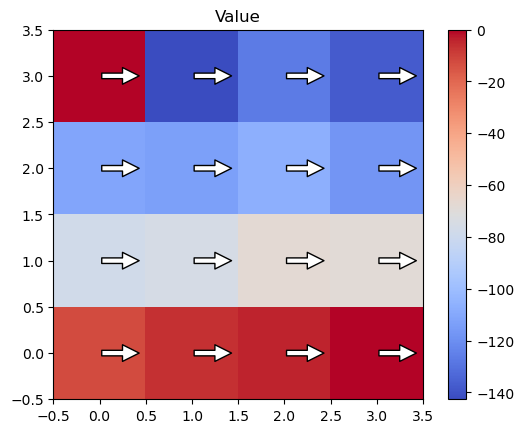

In [7]:
# Values for the "always move right" policy
policy = 0 * np.ones(16) # all 0 = move right
value_func = monte_carlo_value_function(policy, 1000)

visualize_function(value_func, "Value")
print(np.round(value_func, 1))
visualize_policy(policy)
plt.show()


[   0.    -1.5  -62.   -62.   -23.4  -67.   -77.3  -99.   -42.5  -68.
  -77.4  -54.   -85.5  -94.  -106.5    0. ]


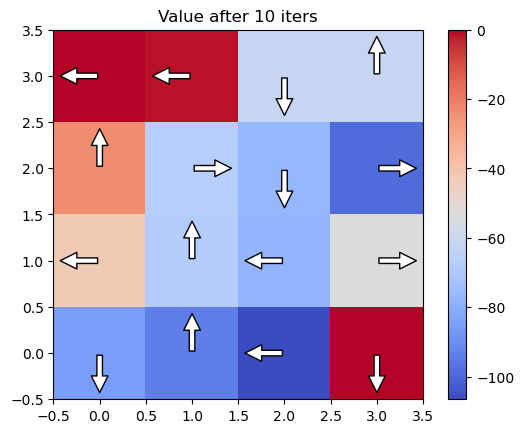

[   0.    -6.3  -59.7  -54.7   -4.1  -62.5  -64.8  -86.3  -65.3  -64.7
  -63.8  -63.5 -100.9  -52.8  -53.3    0. ]


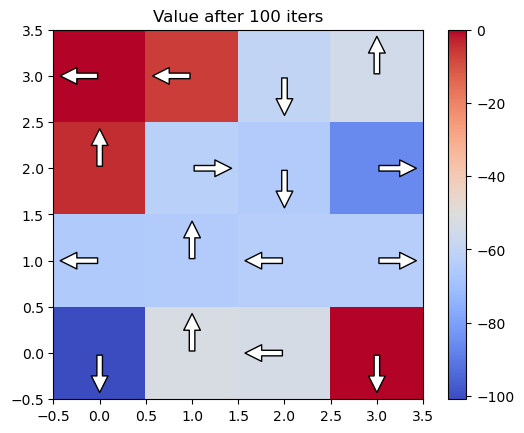

In [13]:
# Values for a RANDOM policy
np.random.seed(4)
policy = np.random.randint(0, 4, 16) # (Low, High, Size)
# print(policy)

value_func_10 = monte_carlo_value_function(policy, 10)
print(np.round(value_func_10, 1))
visualize_function(value_func_10, "Value after 10 iters")
visualize_policy(policy)
plt.show()

value_func_100 = monte_carlo_value_function(policy, 100)
print(np.round(value_func_100, 1))
visualize_function(value_func_100, "Value after 100 iters")
visualize_policy(policy)
plt.show()

## Policy Improvement by using the Greedy Policy

In [31]:
# For a given value function, returns the greedy policy of that value function.
# num_tries_per_action: Number of tries per action to estimate the value.
def greedy_policy(value_function, num_tries_per_action=1): 
	policy = np.zeros(16)
	for state in range(16):
		best_action = -1
		best_value = -np.inf

		for action in range(4):  # Check all possible actions (0 to 3, e.g., up, down, left, right)
			new_value = 0  # will estimate the value of this action by trying it a few times!
			for try_count in range(1, num_tries_per_action + 1):
				new_state = gridworld_next_state(state, action) 
				new_value += 1 / try_count * (value_function[new_state] - new_value) # average value of the new state

			# print(f"State: {state}, Action: {action}, Estimated Value: {new_value}")

			if new_value > best_value:
				best_action = action
				best_value = new_value

		policy[state] = best_action
		# print(f"Best Action for State {state}: {best_action} with Value: {best_value}")
	return policy # Greedy policy for each state (size 16).

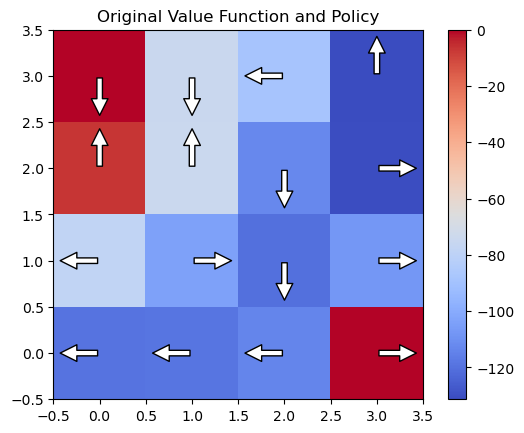

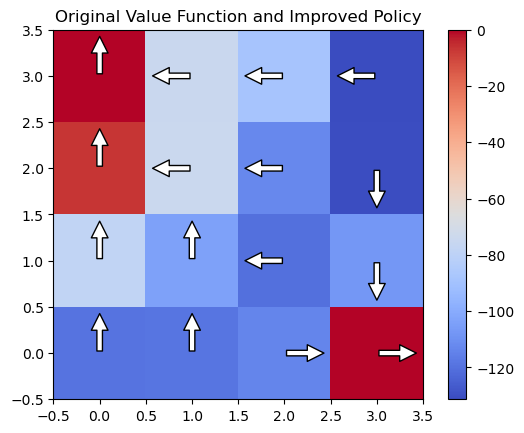

In [34]:
# Values for a RANDOM policy
policy = np.random.randint(0, 4, 16)
value_func = monte_carlo_value_function(policy, 100)

visualize_function(value_func, "Original Value Function and Policy")
visualize_policy(policy)
plt.show()

improved_policy = greedy_policy(value_func)
# print(improved_policy)
visualize_function(value_func, "Original Value Function and Improved Policy")
visualize_policy(improved_policy)
plt.show()

## Iterate MC value and Greedy Policy Improvement

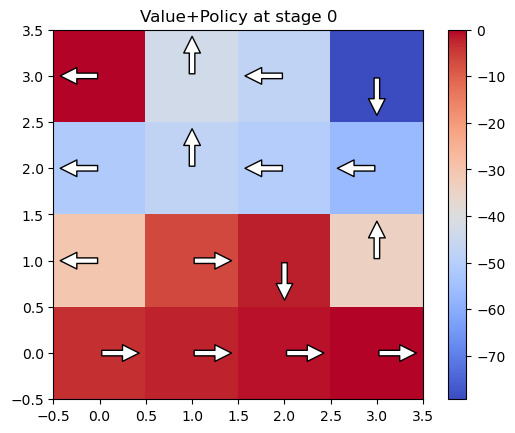

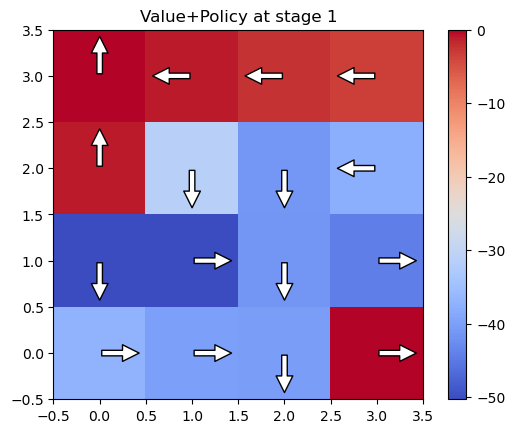

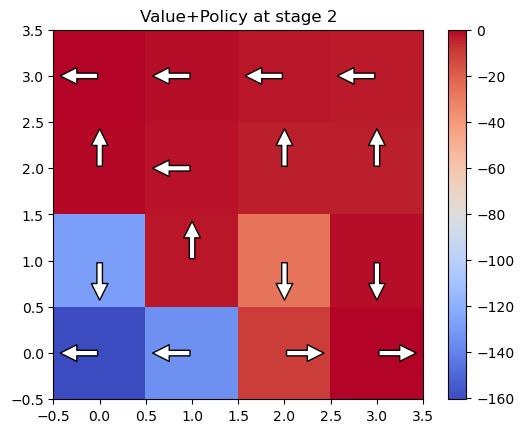

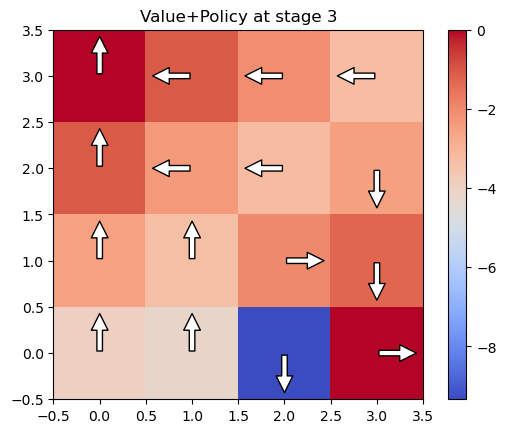

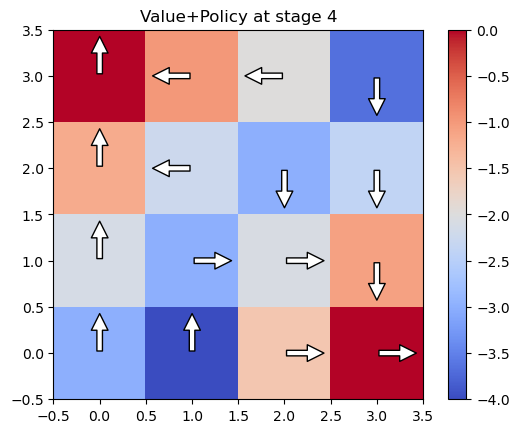

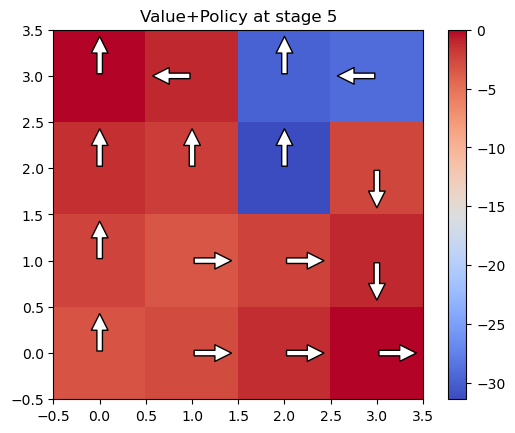

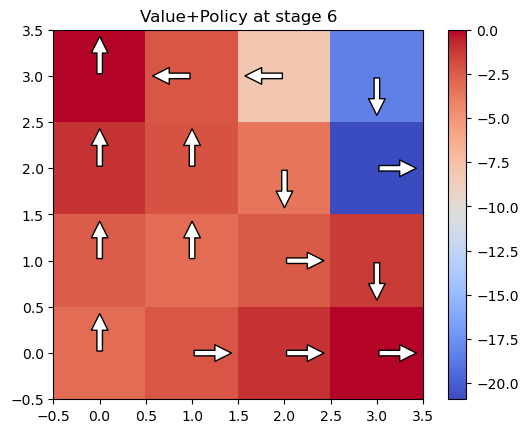

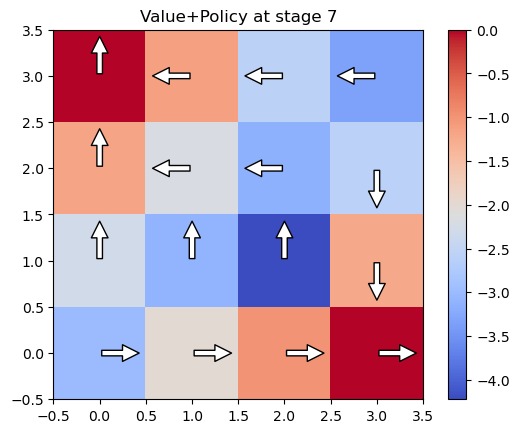

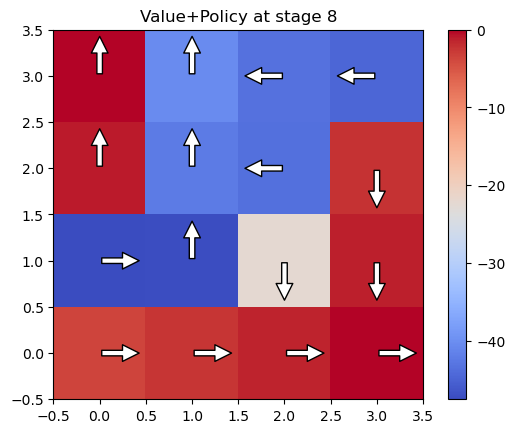

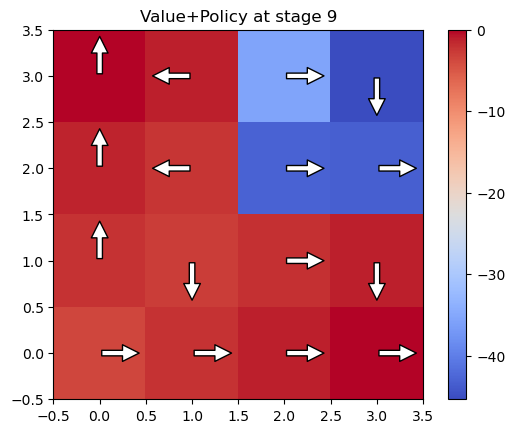

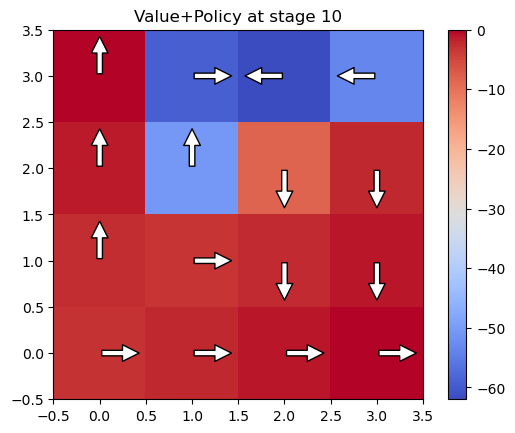

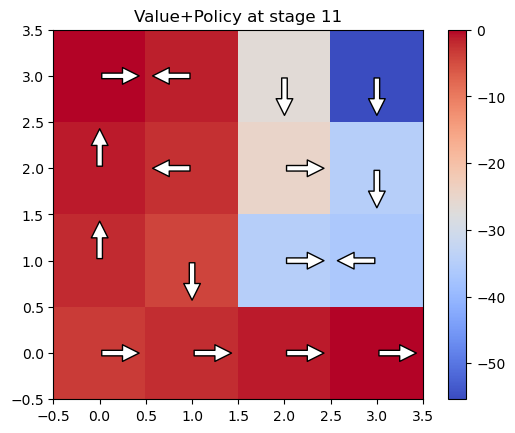

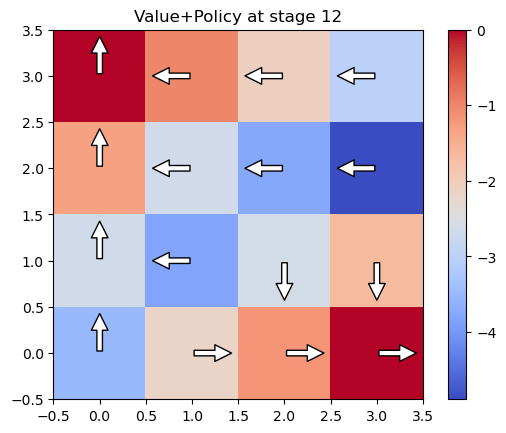

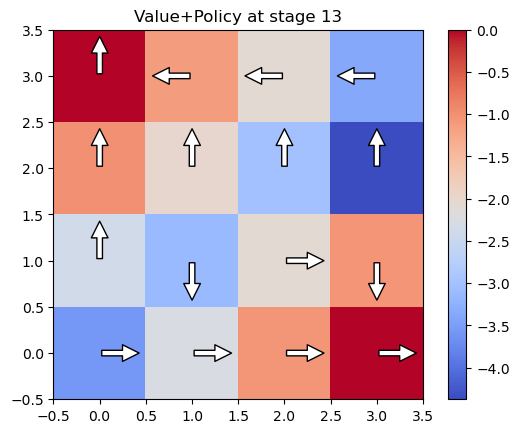

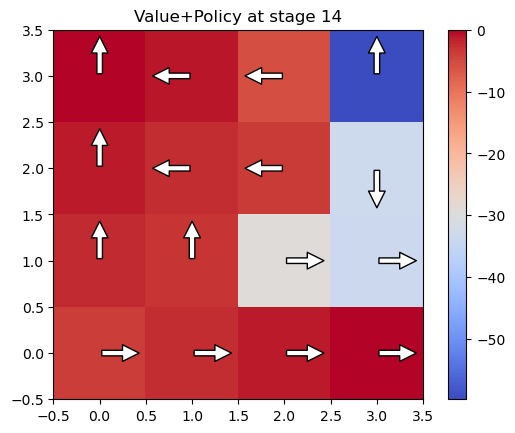

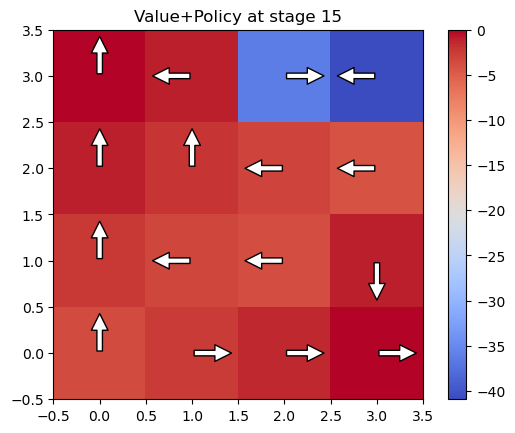

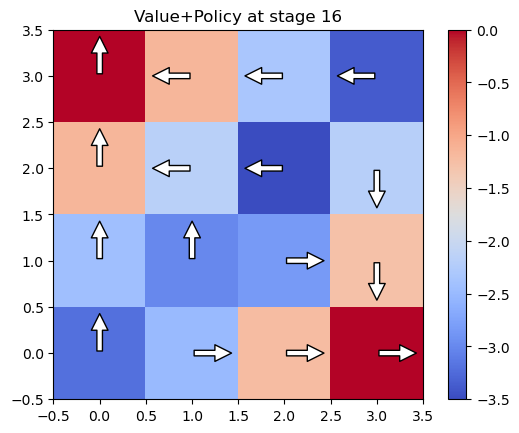

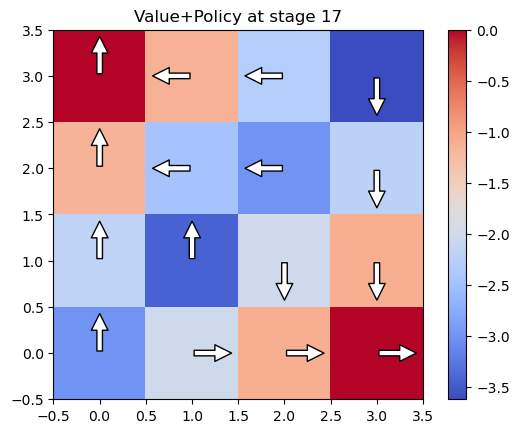

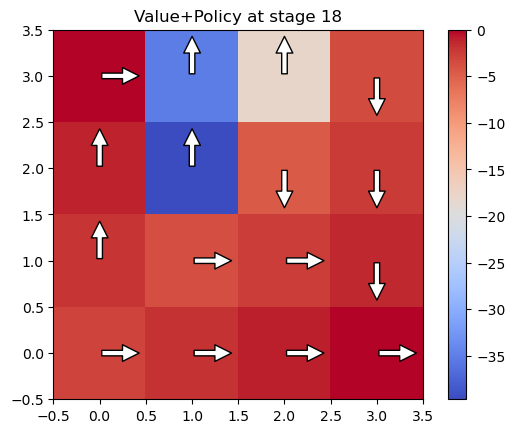

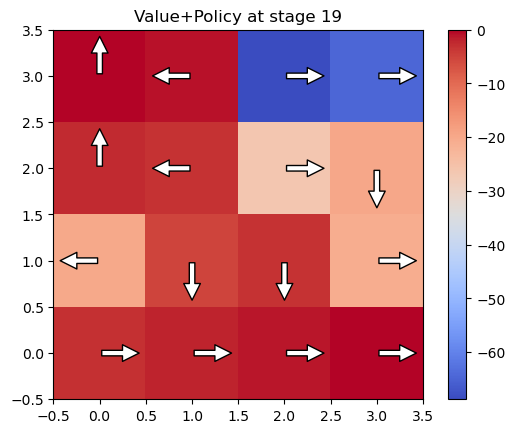

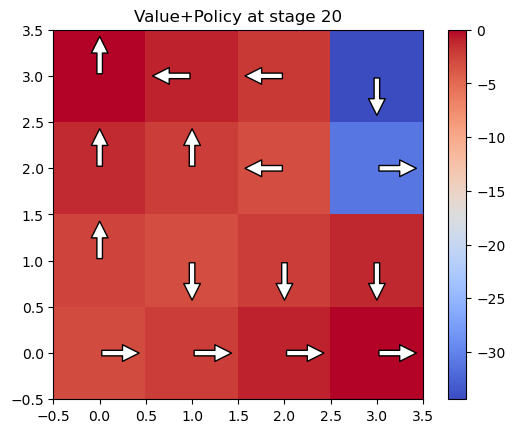

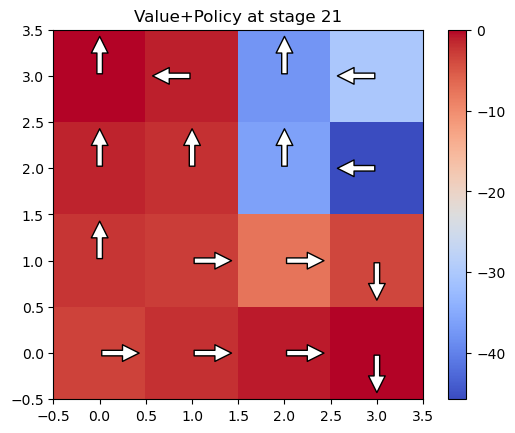

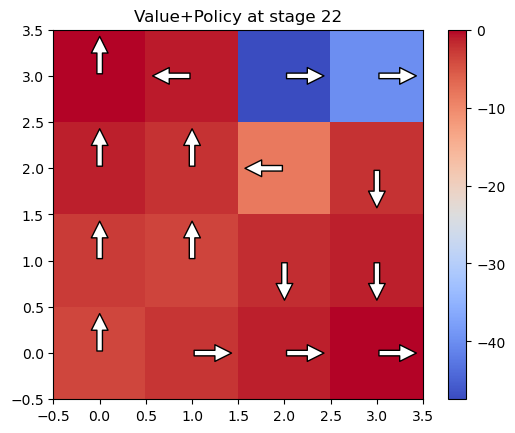

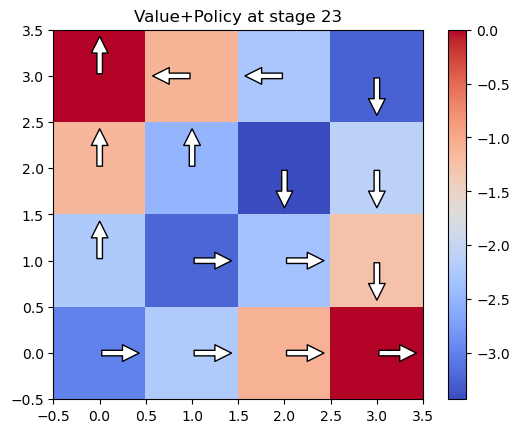

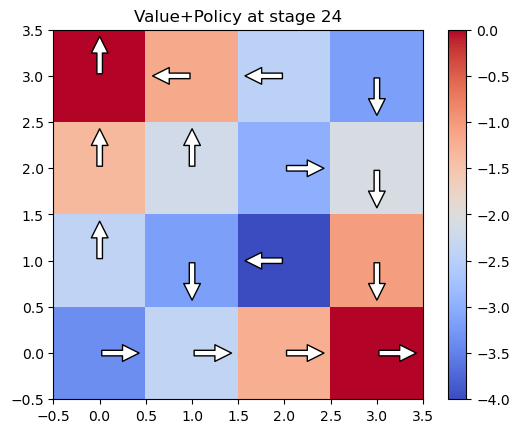

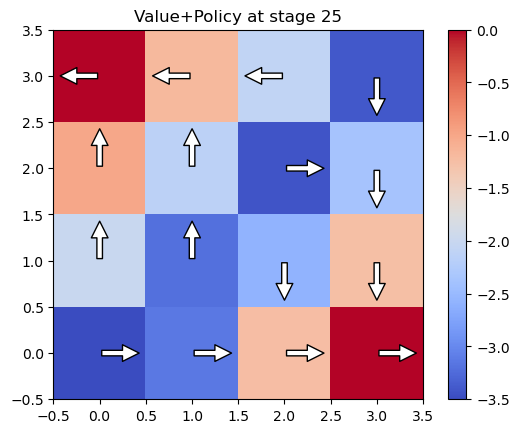

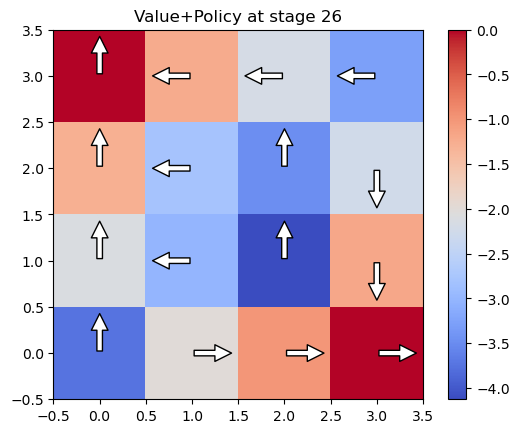

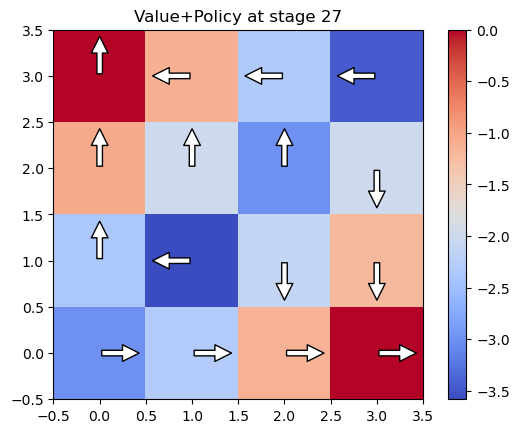

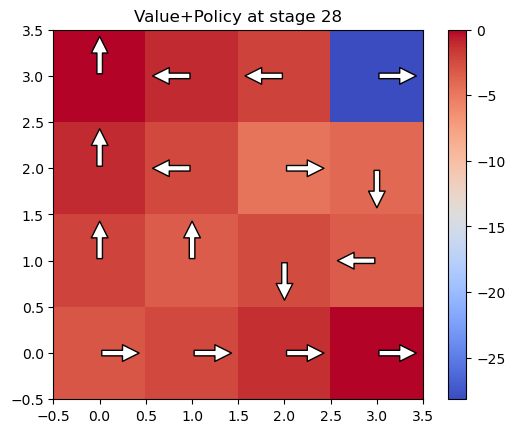

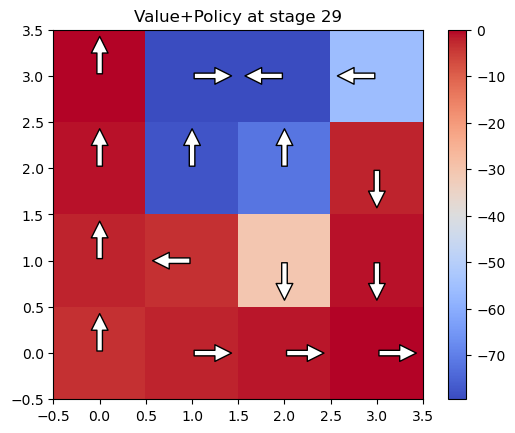

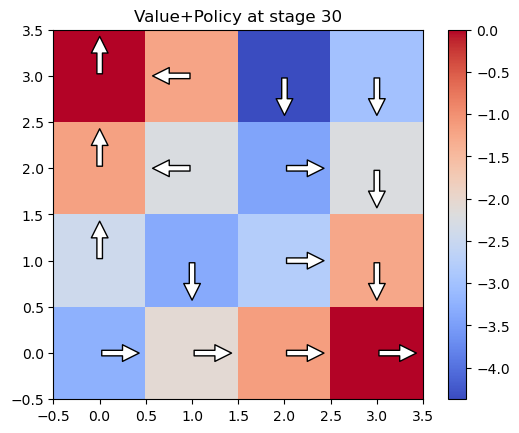

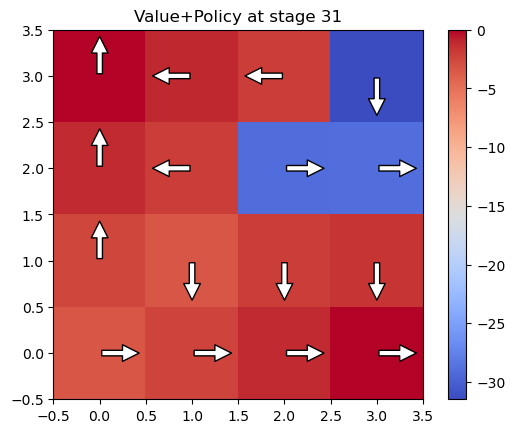

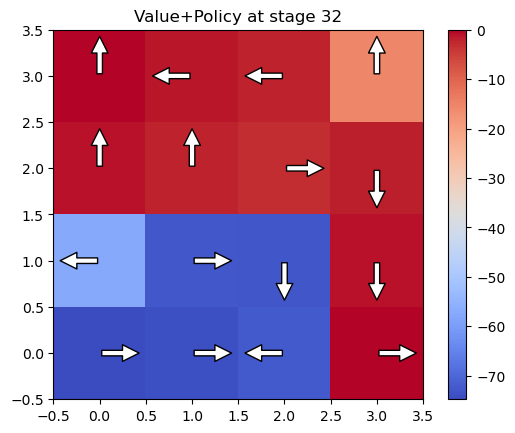

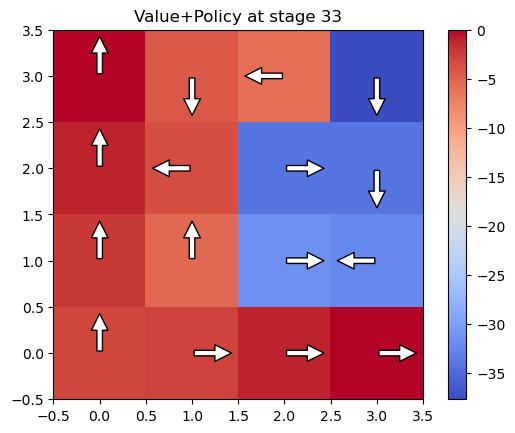

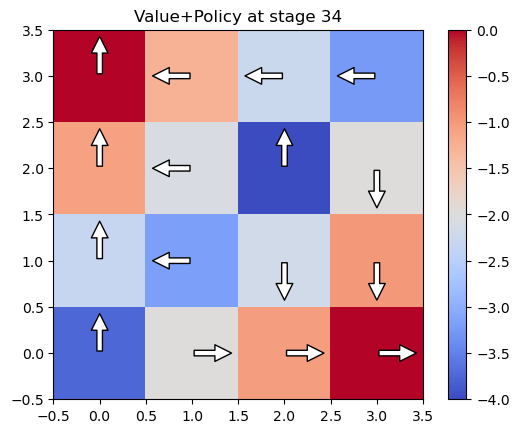

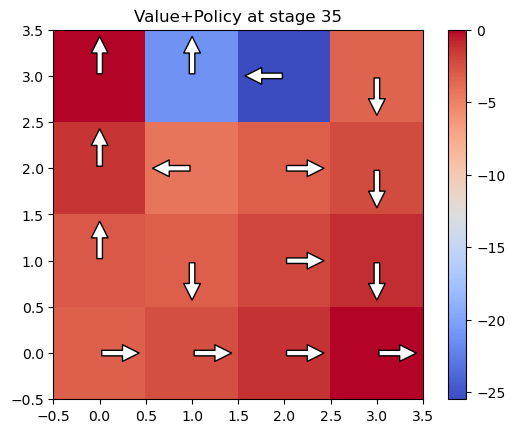

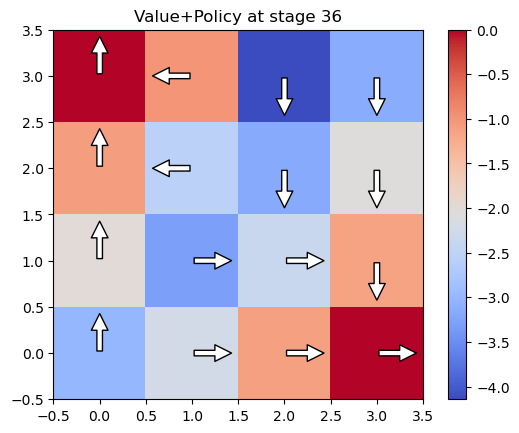

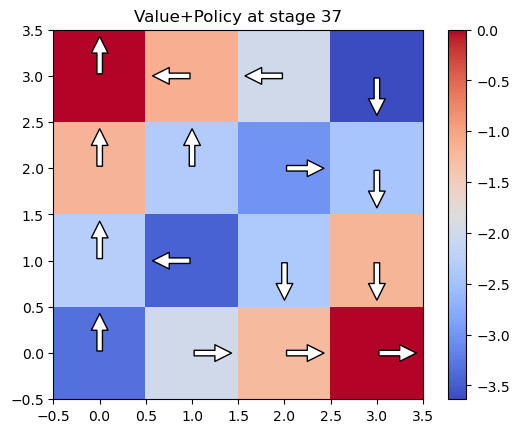

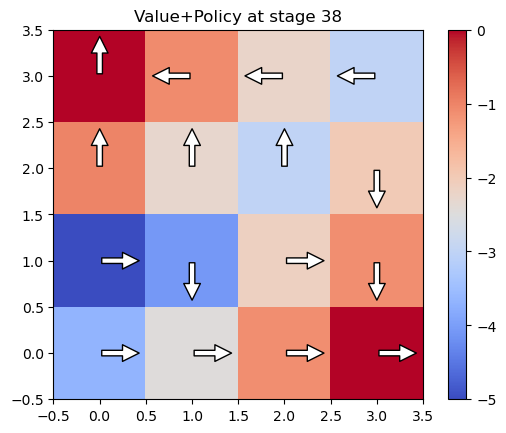

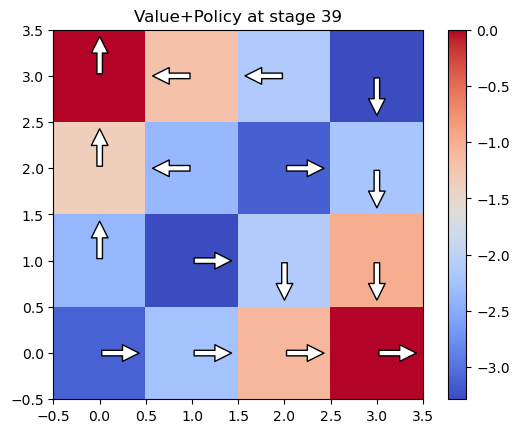

In [35]:
policy = np.random.randint(0, 4, 16)

for i in range(40):
	value_func = monte_carlo_value_function(policy, 100) # Evaluate the policy
	
	visualize_function(value_func, "Value+Policy at stage " + str(i))
	visualize_policy(policy)
	plt.show()
	
	policy = greedy_policy(value_func, num_tries_per_action=1) # Improve the policy
